In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
np.random.seed(0)

## Data loading

In [74]:
cycleA = pd.read_csv("Data/Chickens data/CycleA-Data301022.csv", sep=";")
cycleB = pd.read_csv("Data/Chickens data/CycleB-Data301022.csv", sep=";")
meteorological_data = pd.read_csv("Data/Meteorological data/RW_20221107172813_515881_5121_1.csv", sep=",")

## Data cleaning

In [75]:
# fill NaN value
cycleA = cycleA.fillna(0)
cycleB = cycleB.fillna(0)

# removing rows with Nan values from chickens data
cycleA = cycleA.dropna()
cycleB = cycleB.dropna()

# removing rows with non valid data from meteorological data
meteorological_data = meteorological_data[meteorological_data["Valore Medio Giornaliero"] != -999.0]

# removing "%" value from chickens data
cycleA["% laied"] = cycleA["% laied"].str.rstrip("%").astype(float)
cycleB["% laied"] = cycleB["% laied"].str.rstrip("%").astype(float)

## Data preview

### Cycle A

In [76]:
cycleA.head()

,Arrival Chickens Date,Chickens Death Per Day,Current Chickens,Date of Laid,# of Eggs,% laied,Water Consuption (gr),Feed Consuption (gr),Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality)
0,19/07/2018,0.0,42173.0,07/08/2018,0,0.0,81.0,59.5,0,0,0
1,19/07/2018,5.0,42168.0,08/08/2018,0,0.0,81.5,65.0,0,0,0
2,19/07/2018,2.0,42166.0,09/08/2018,0,0.0,83.5,69.0,0,0,0
3,19/07/2018,2.0,42164.0,10/08/2018,0,0.0,82.0,67.5,0,0,0
4,19/07/2018,4.0,42160.0,11/08/2018,0,0.0,84.0,80.0,0,0,0


### Cycle B

In [77]:
cycleB.head()

,Arrival Chickens Date,Chickens Death Per Day,Current Chickens,Date of Laid,# of Eggs,% laied,Water Consuption (gr),Feed Consuption (gr),Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality)
0,09/08/2020,1.0,42215.0,04/09/2020,1470.0,3.48,110.0,81.0,04/09/2020,1470.0,0.0
1,09/08/2020,0.0,42215.0,05/09/2020,0.0,0.00,109.0,90.0,0,0.0,0.0
2,09/08/2020,0.0,42215.0,06/09/2020,0.0,0.00,111.0,86.0,0,0.0,0.0
3,09/08/2020,2.0,42213.0,07/09/2020,0.0,0.00,109.0,94.0,0,0.0,0.0
4,09/08/2020,0.0,42213.0,08/09/2020,0.0,0.00,105.0,94.0,0,0.0,0.0


### Meteorological data

In [78]:
meteorological_data.head()

,Id Sensore,Data-Ora,Valore Medio Giornaliero,Minimo Valore Medio Orario,Massimo Valore Medio Orario
0,5121,2018/01/01,3.0,1.1,4.2
1,5121,2018/01/02,5.2,1.1,12.3
2,5121,2018/01/03,2.4,-0.9,5.1
3,5121,2018/01/04,4.8,2.5,9.1
4,5121,2018/01/05,4.0,-1.1,8.5


## Data normalization

In [79]:
# apply min-max normalization techniques

for column in cycleA:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling"):
        cycleA[column] = (cycleA[column] - cycleA[column].min()) / (cycleA[column].max() - cycleA[column].min())
        
for column in cycleB:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling"):
        cycleB[column] = (cycleB[column] - cycleB[column].min()) / (cycleB[column].max() - cycleB[column].min())

## Data inspection

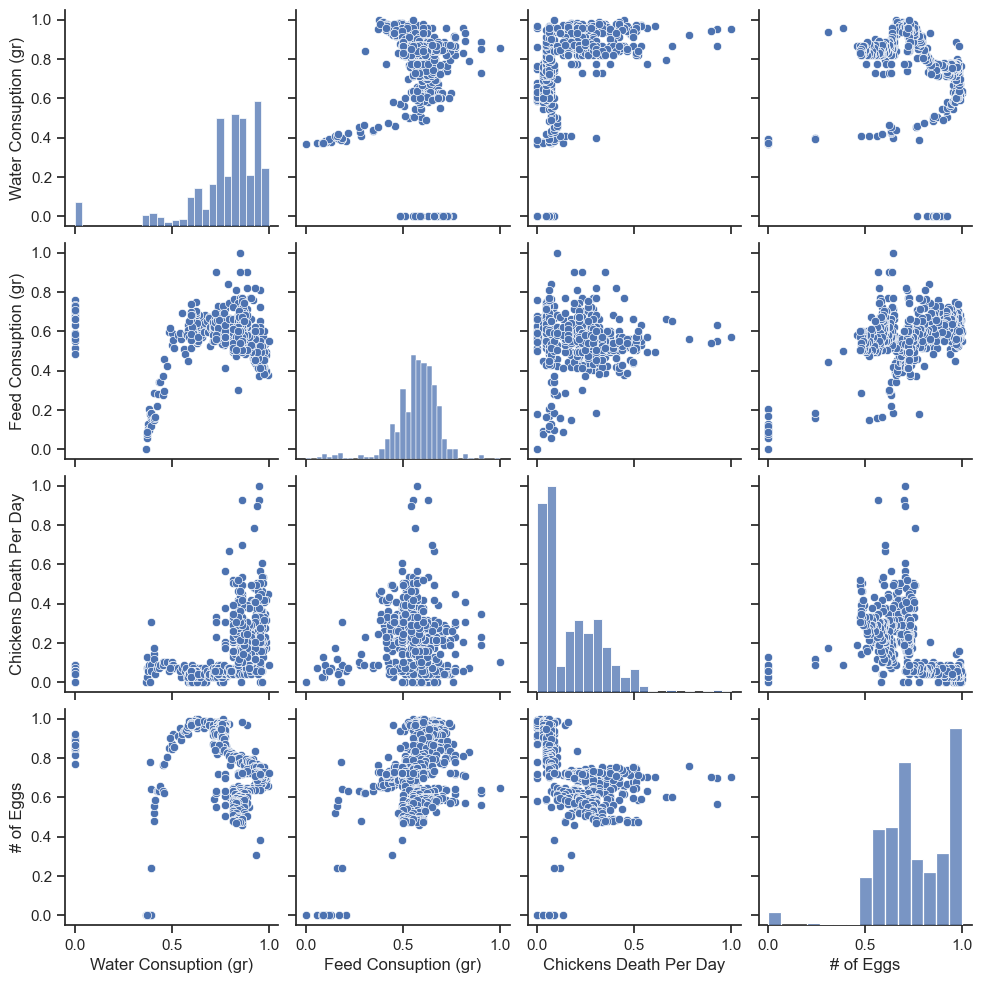

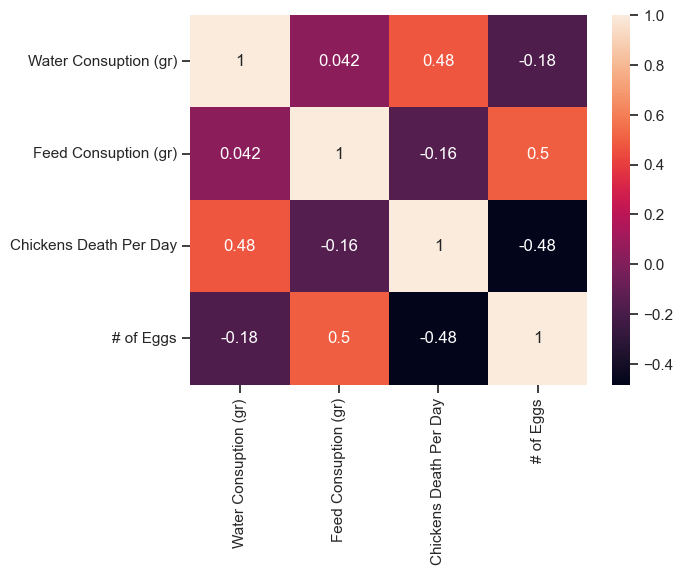

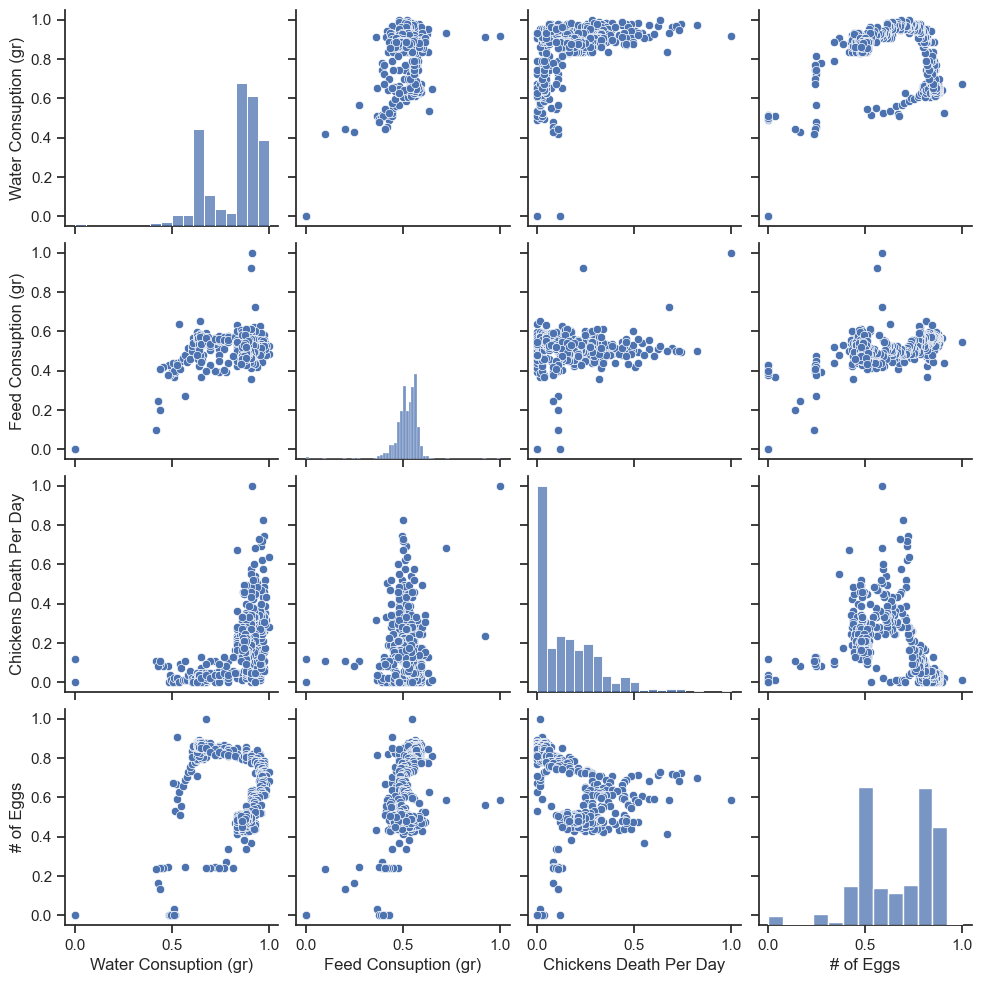

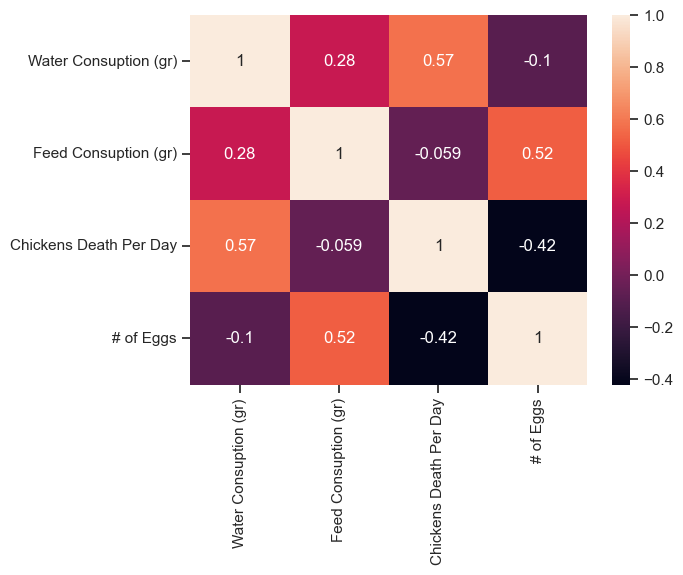

In [82]:
# input (x) and output (y) features
x_feautures = ["Water Consuption (gr)", "Feed Consuption (gr)"]
y_feautures = ["Chickens Death Per Day", "# of Eggs"]

# pair plot cycle A
#norm_a = np.array()
sns.set(style="ticks", color_codes=True)
sns.pairplot(cycleA[x_feautures + y_feautures])
plt.show()

# heatmap cycle A
sns.heatmap(cycleA[x_feautures + y_feautures].corr(), annot=True)
plt.show()
# found a strong correlation between:
#   -   FEED and EGGS
#   -   WATER and DEATH

# pair plot cycle B
sns.set(style="ticks", color_codes=True)
sns.pairplot(cycleB[x_feautures + y_feautures])
plt.show()

# heatmap cycle B
sns.heatmap(cycleB[x_feautures + y_feautures].corr(), annot=True)
plt.show()